# Практика по обучению моделей

В этом практическом задании мы закрепим на практике как обучать модели в tensorflow на синтетических данных. В задачах ниже необходимо получить точность выше 90%. Советуем не сдаваться на этом -- везде реально получить 100%. А в последнем задании можно получить бонусные баллы за модель с минимальным количеством параметров.

In [1]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
print(tf.__version__)

2024-05-02 15:03:38.457833: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 15:03:39.294460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


In [2]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))


def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits

    x_min, x_max = xs
    y_min, y_max = ys

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)

    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy()

    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)

    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True,
              fontsize=10, colors="green")

    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)


def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

**1a**. Начнем с классической задачи -- XOR.

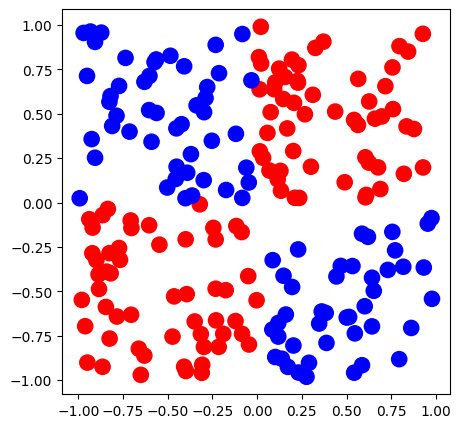

In [3]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)

In [41]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    ~3 скрытых слоев достаточно
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор
# 4. определите лосс (не забудьте указать from_logits=True!!)

model.add(tf.keras.layers.Dense(15, input_shape=(2, ), activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.add(tf.keras.layers.Dense(1))

# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5633 - loss: 0.6887
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5498 - loss: 0.6839 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5404 - loss: 0.6794 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5336 - loss: 0.6753 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5456 - loss: 0.6704 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5477 - loss: 0.6656 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5232 - loss: 0.6622 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5456 - loss: 0.6548 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5446 - loss: 0.6494 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5362 - loss: 0.6422 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 0.6362 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - lo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0146
Perfect!


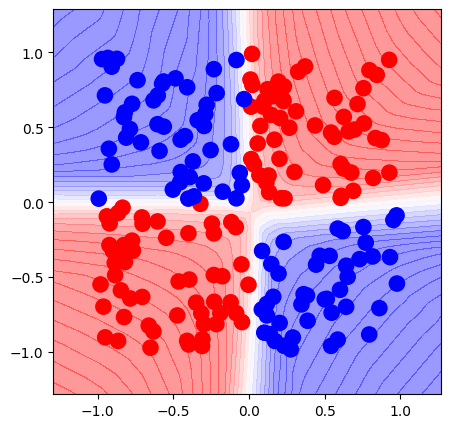

In [42]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y,
                                n_lines=50,
                                show_lines=False)

**1b**

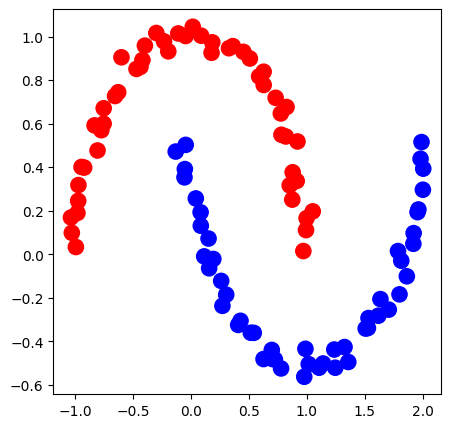

In [76]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.04)
show_data(X, y)

In [78]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    ~3 скрытых слоев достаточно
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор
# 4. определите лосс (не забудьте указать from_logits=True!!)

model.add(tf.keras.layers.Dense(15, input_shape=(2, ), activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.add(tf.keras.layers.Dense(1))


# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.5156 - loss: 0.6908
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4844 - loss: 0.6607 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 0.6185 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 0.5728 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 0.5224 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5208 - loss: 0.4783 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.4490 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.4188 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8687 - loss: 0.3597 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3320 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3096 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8835 - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 3.7103e-05
Perfect!


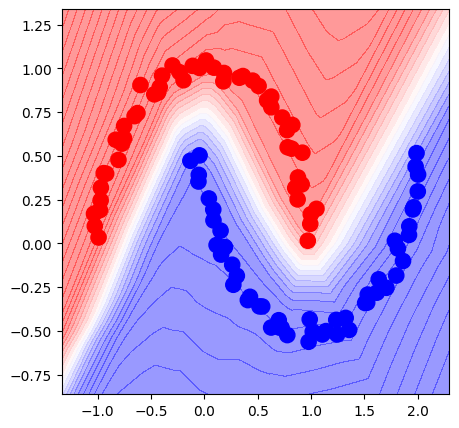

In [79]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y,
                                n_lines=50,
                                show_lines=False)

**1c**

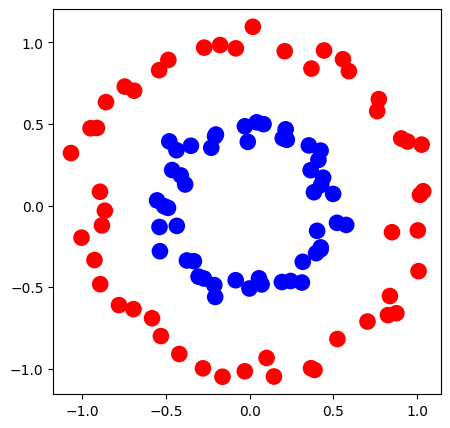

In [80]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.05)
show_data(X, y)

In [83]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    Постарайтесь сделать количество слоев и нейронов минимальным.
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор
# 4. определите лосс (не забудьте указать from_logits=True!!)

model.add(tf.keras.layers.Dense(4, input_shape=(2, ), activation="relu"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.add(tf.keras.layers.Dense(1))


# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.4629 - loss: 0.6903
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4867 - loss: 0.6912 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4867 - loss: 0.6809 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5104 - loss: 0.6800 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 0.6771 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 0.6854 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 0.6764 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4740 - loss: 0.6668 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 0.6691 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4792 - loss: 0.6700 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 0.6700 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4896 - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1451
Perfect!
Bonus points!


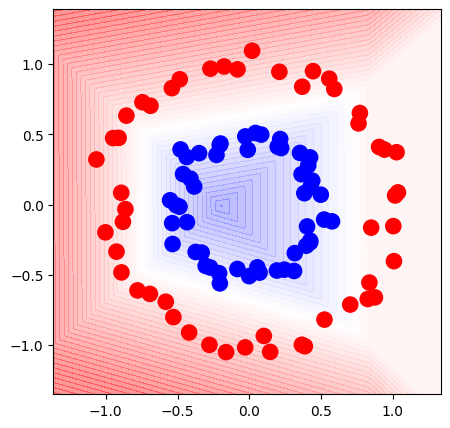

In [84]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print("Bonus points!")
else:
    print(f"Model has {model.count_params()} parameters")

show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y,
                                n_lines=50,
                                show_lines=False)